<a href="https://colab.research.google.com/github/ovllya126/UTS_ML2019_ID13307095/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import requests

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import seaborn as sns;
sns.set()

from sklearn import preprocessing
from google.colab import files



# Preprocessing

In [18]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/steam_training.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners
0,1,Counter-Strike,1/11/00,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,10000000-20000000
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,5000000-10000000
2,3,Day of Defeat,1/5/03,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,5000000-10000000
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,5000000-10000000
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,5000000-10000000


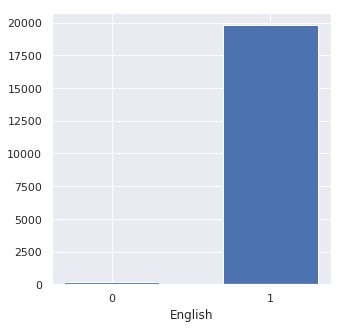

In [8]:
#attributes exploration
#plot 'english'

plt.figure(figsize=(5,5))
bins = np.arange(3) - 0.5
plt.hist(st.english, bins, rwidth = 0.6)

plt.xticks([0,1])
plt.xlabel('English')
plt.show()

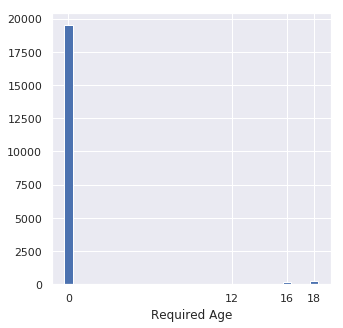

In [11]:
#plot 'required_age'
plt.figure(figsize=(5,5))
bins = np.arange(20) - 0.5
plt.hist(st.required_age, bins, rwidth = 0.6)

plt.xticks([0,12,16,18])
plt.xlabel('Required Age')
plt.show()

In [12]:
st.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,20000.000000,20000.00000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.98935,0.412900,41.388900,1.328045e+03,277.766900,196.116900,189.219350,6.605311
std,5773.647028,0.10265,2.587614,317.345084,2.208055e+04,4981.099289,2098.406866,2687.030391,7.885331
min,1.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,1.00000,0.000000,0.000000,1.100000e+01,4.000000,0.000000,0.000000,1.990000
50%,10000.500000,1.00000,0.000000,9.000000,4.000000e+01,15.000000,0.000000,0.000000,4.790000
75%,15000.250000,1.00000,0.000000,25.000000,2.040000e+02,66.000000,30.250000,31.250000,7.990000
max,20000.000000,1.00000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,303.990000


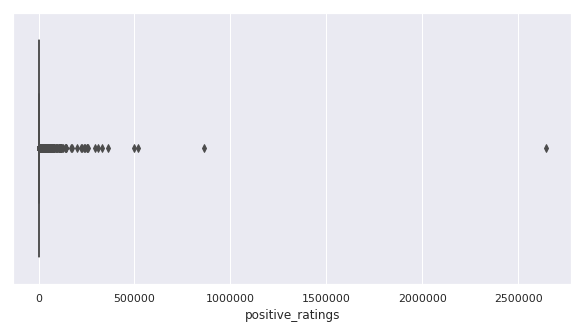

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(st.positive_ratings)

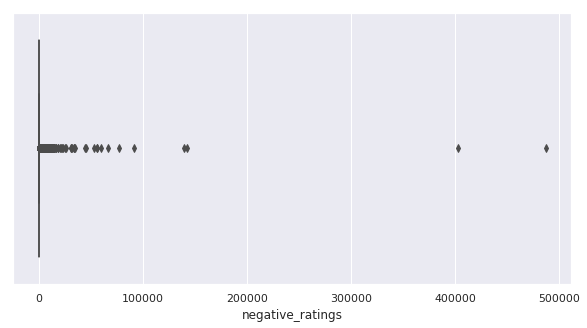

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(st.negative_ratings)

Text(0, 0.5, 'number')

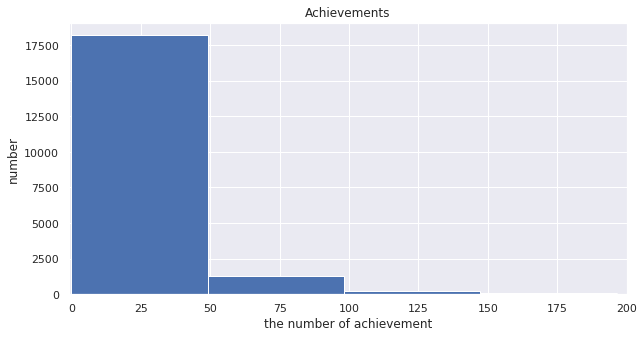

In [12]:
plt.figure(figsize=(10,5))
plt.hist(st.achievements,bins=200)
plt.xlim(right = 200)
plt.xlim(left = -1)
plt.title("Achievements")
plt.xlabel("the number of achievement")
plt.ylabel("number")

Text(0, 0.5, 'number')

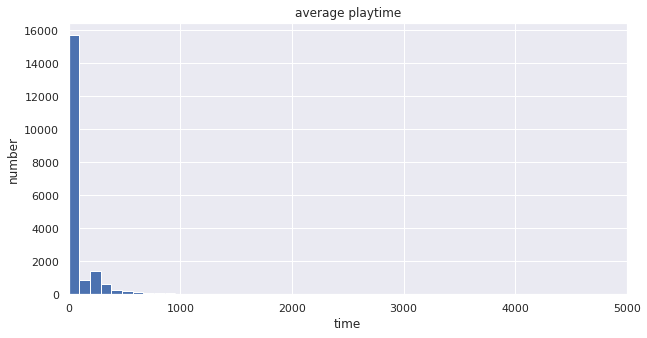

In [13]:
plt.figure(figsize=(10,5))
plt.hist(st.average_playtime,bins=2000)
plt.xlim(right = 5000)
plt.xlim(left = -1)
plt.title("average playtime")
plt.xlabel("time")
plt.ylabel("number")

Text(0, 0.5, 'number')

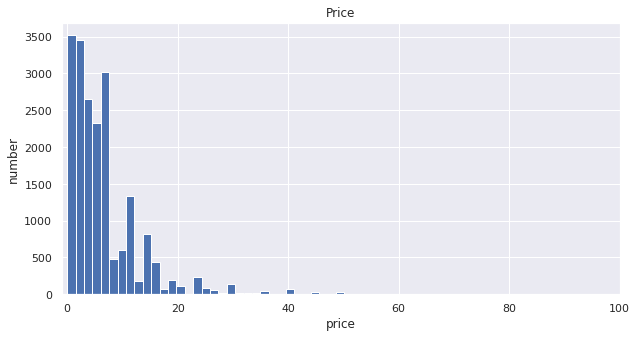

In [17]:
plt.figure(figsize=(10,5))
plt.hist(st.price,bins=200)
plt.xlim(right = 100)
plt.xlim(left = -1)
plt.title("Price")
plt.xlabel("price")
plt.ylabel("number")


In [0]:
def enco(data):
  reshape_data = data.to_numpy().reshape(-1,1)
  enc = preprocessing.OrdinalEncoder().fit(reshape_data)
  return enc.transform(reshape_data)

In [0]:
st.platforms = enco(st.platforms)
st.owners = enco(st.owners)

In [8]:
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners
0,1,Counter-Strike,1/11/00,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,3.0
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,11.0
2,3,Day of Defeat,1/5/03,1,Valve,Valve,5.0,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,11.0
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,11.0
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,5.0,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,11.0


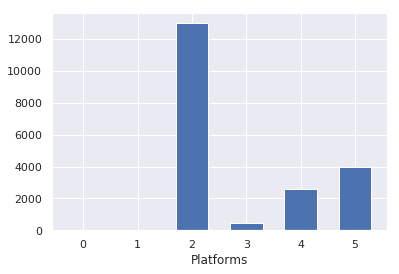

In [18]:
#plot 'platforms'
bins = np.arange(7) - 0.5
plt.hist(st.platforms, bins, rwidth = 0.6)

plt.xticks([0,1,2,3,4,5])
plt.xlabel('Platforms')
plt.show()

In [40]:
def cg_class(name,cg):
  st[name] = 0
  for i in range(0,19999):
    if cg in st.categories[i]:
      st[name][i] = 1

cg_class('Player', 'Multiplayer')
cg_class('VAC', 'Valve Anti-Cheat enabled')
cg_class('STC', 'Steam Trading Cards')
cg_class('PCS', 'Partial Controller Support')
cg_class('ISS', 'Includes Source SDK')
cg_class('Cloud', 'Steam Cloud')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
def genres_class(name,genres):
  st[name] = 0
  for i in range(0,19999):
    if genres in st.genres[i]:
      st[name][i] = 1

genres_class('Action', 'Action')
genres_class('Free', 'Free to Play')
genres_class('Strategy', 'Strategy')
genres_class('Adventure', 'Adventure')
genres_class('Indie', 'Indie')
genres_class('RPG', 'RPG')
genres_class('Casual', 'Casual')
genres_class('Racing', 'Racing')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
def scaler(data):
  reshape_data = data.to_numpy().reshape(-1,1)
  return preprocessing.MinMaxScaler().fit_transform(reshape_data)

In [0]:
st.positive_ratings = scaler(st.positive_ratings)
st.negative_ratings = scaler(st.negative_ratings)
st.average_playtime = scaler(st.average_playtime)
st.median_playtime = scaler(st.median_playtime)
st.price = scaler(st.price)

In [2]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/st_modified3.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners,players,VAC,STC,PCS,ISS,cloud,Player,Cloud,Action,Free,Strategy,Adventure,Indie,RPG,Casual,Racing
0,1,Counter-Strike,1/11/00,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.047093,0.006855,0.092391,0.001663,0.023652,10000000-20000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.001255,0.001300,0.001453,0.000325,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Day of Defeat,1/5/03,1,Valve,Valve,5,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,0.001292,0.000817,0.000981,0.000178,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.000481,0.000548,0.001353,0.000965,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,5,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,0.001985,0.000591,0.003273,0.002177,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
st.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms           float64
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
price               float64
owners              float64
dtype: object

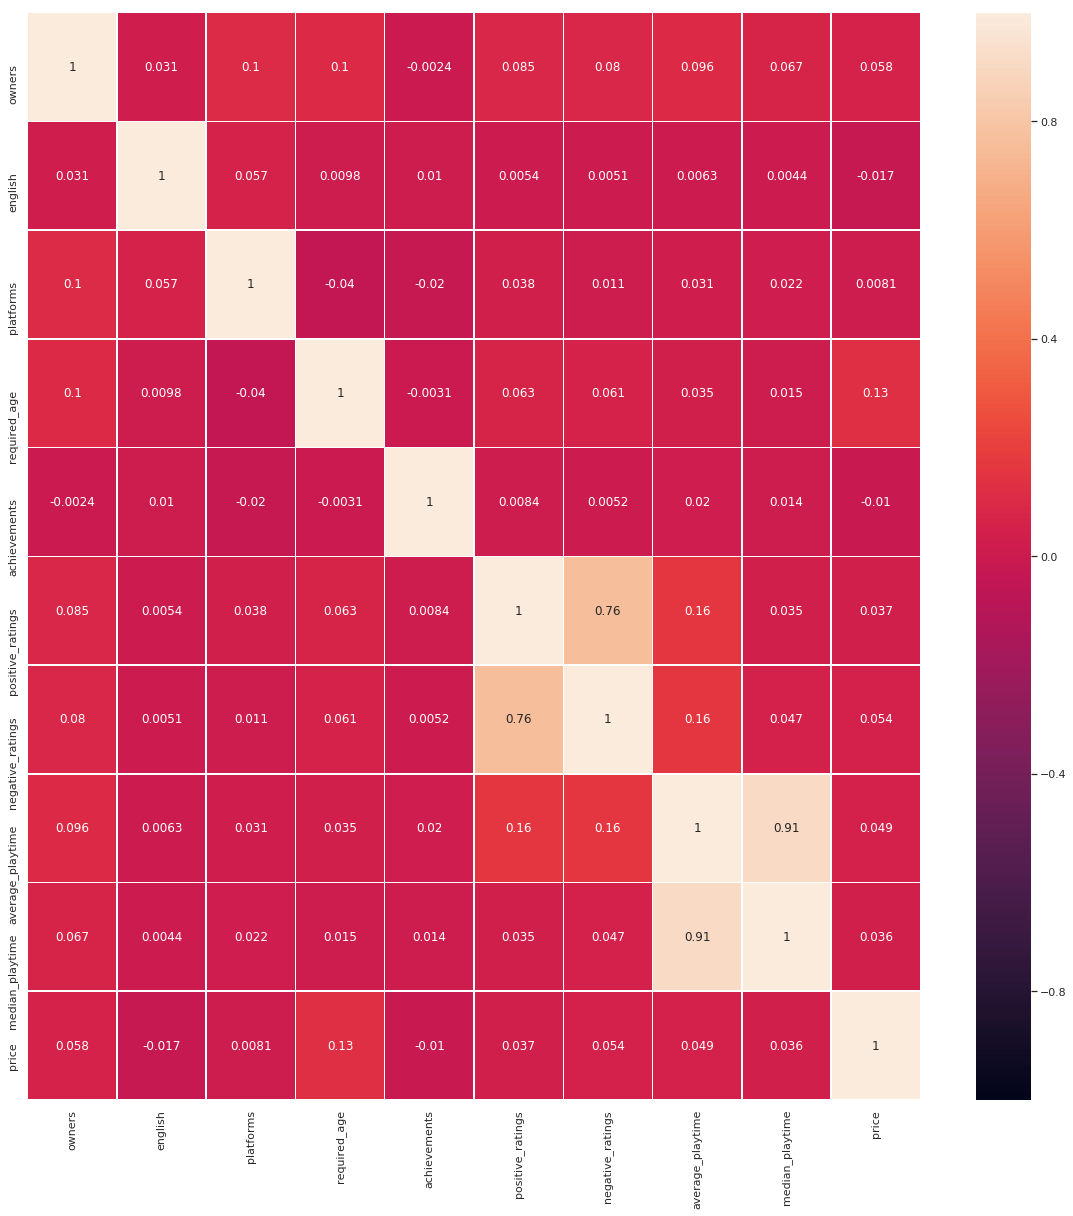

In [26]:

cols = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price' ]

selected_st = np.corrcoef(st[col].values.T)
plt.figure(figsize=(20,20))  
heatmap = sns.heatmap(selected_st, vmin=-1, vmax=1,annot=True, linewidths=.5, xticklabels=col ,yticklabels = col)

heatmap.figure.savefig('heatmap.png')

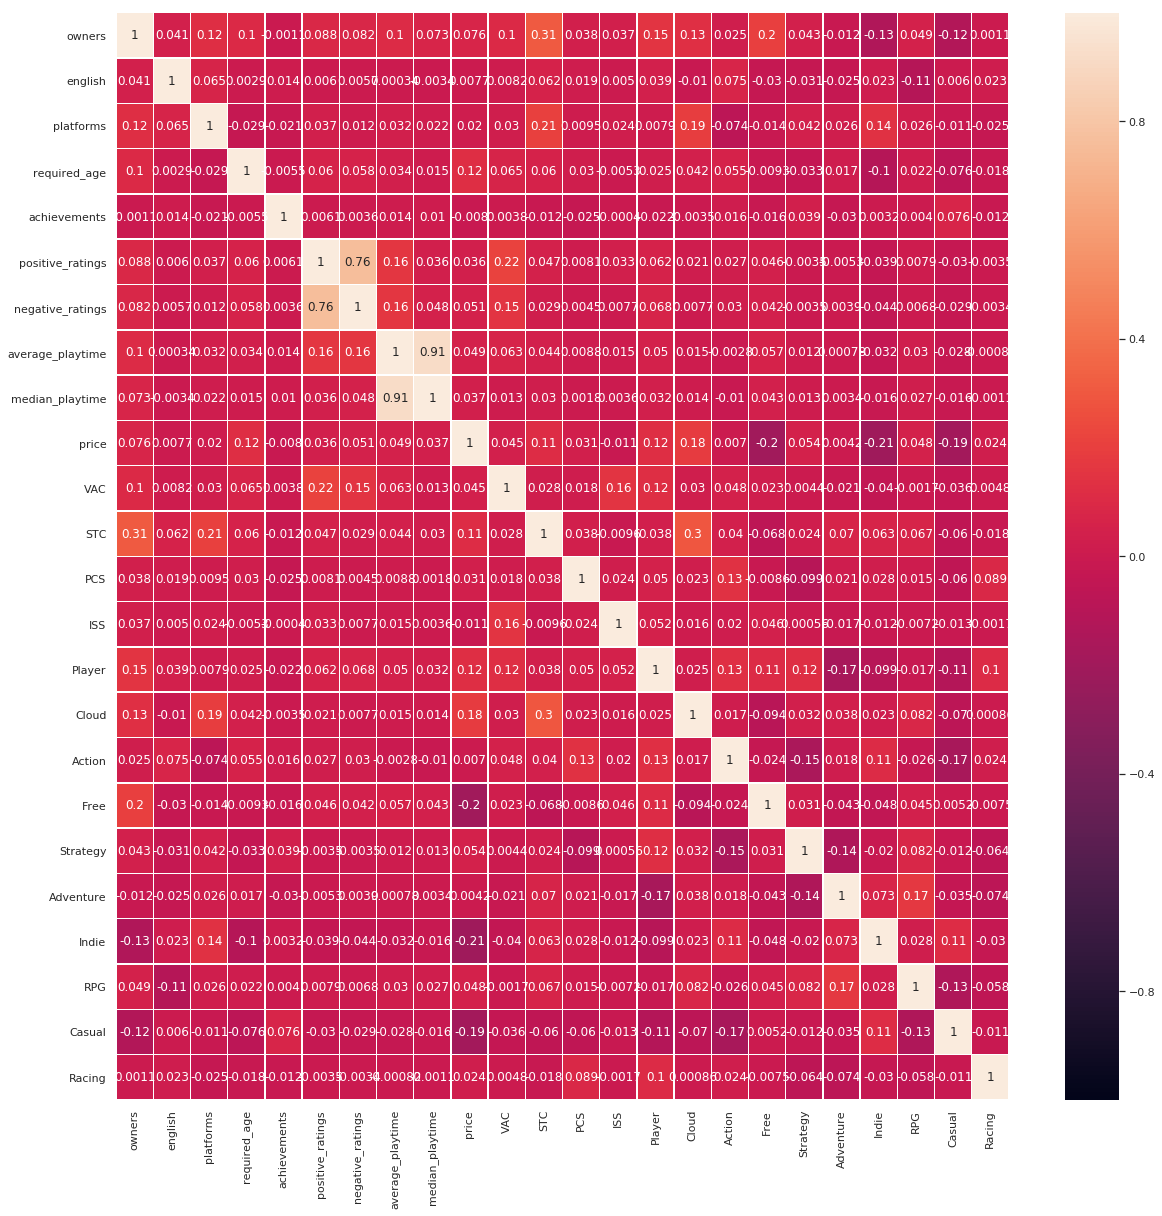

In [3]:
st_corr = st.corr()

col = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price', 'VAC',	'STC',	'PCS',	'ISS',	'Player'	,'Cloud',	'Action',	'Free'	,'Strategy'	,'Adventure',	'Indie',	'RPG',	'Casual',	'Racing' ]

selected_st = np.corrcoef(st[col].values.T)
plt.figure(figsize=(20,20))  
heatmap = sns.heatmap(selected_st, vmin=-1, vmax=1,annot=True, linewidths=.5, xticklabels=col ,yticklabels = col)

heatmap.figure.savefig('heatmap.png')

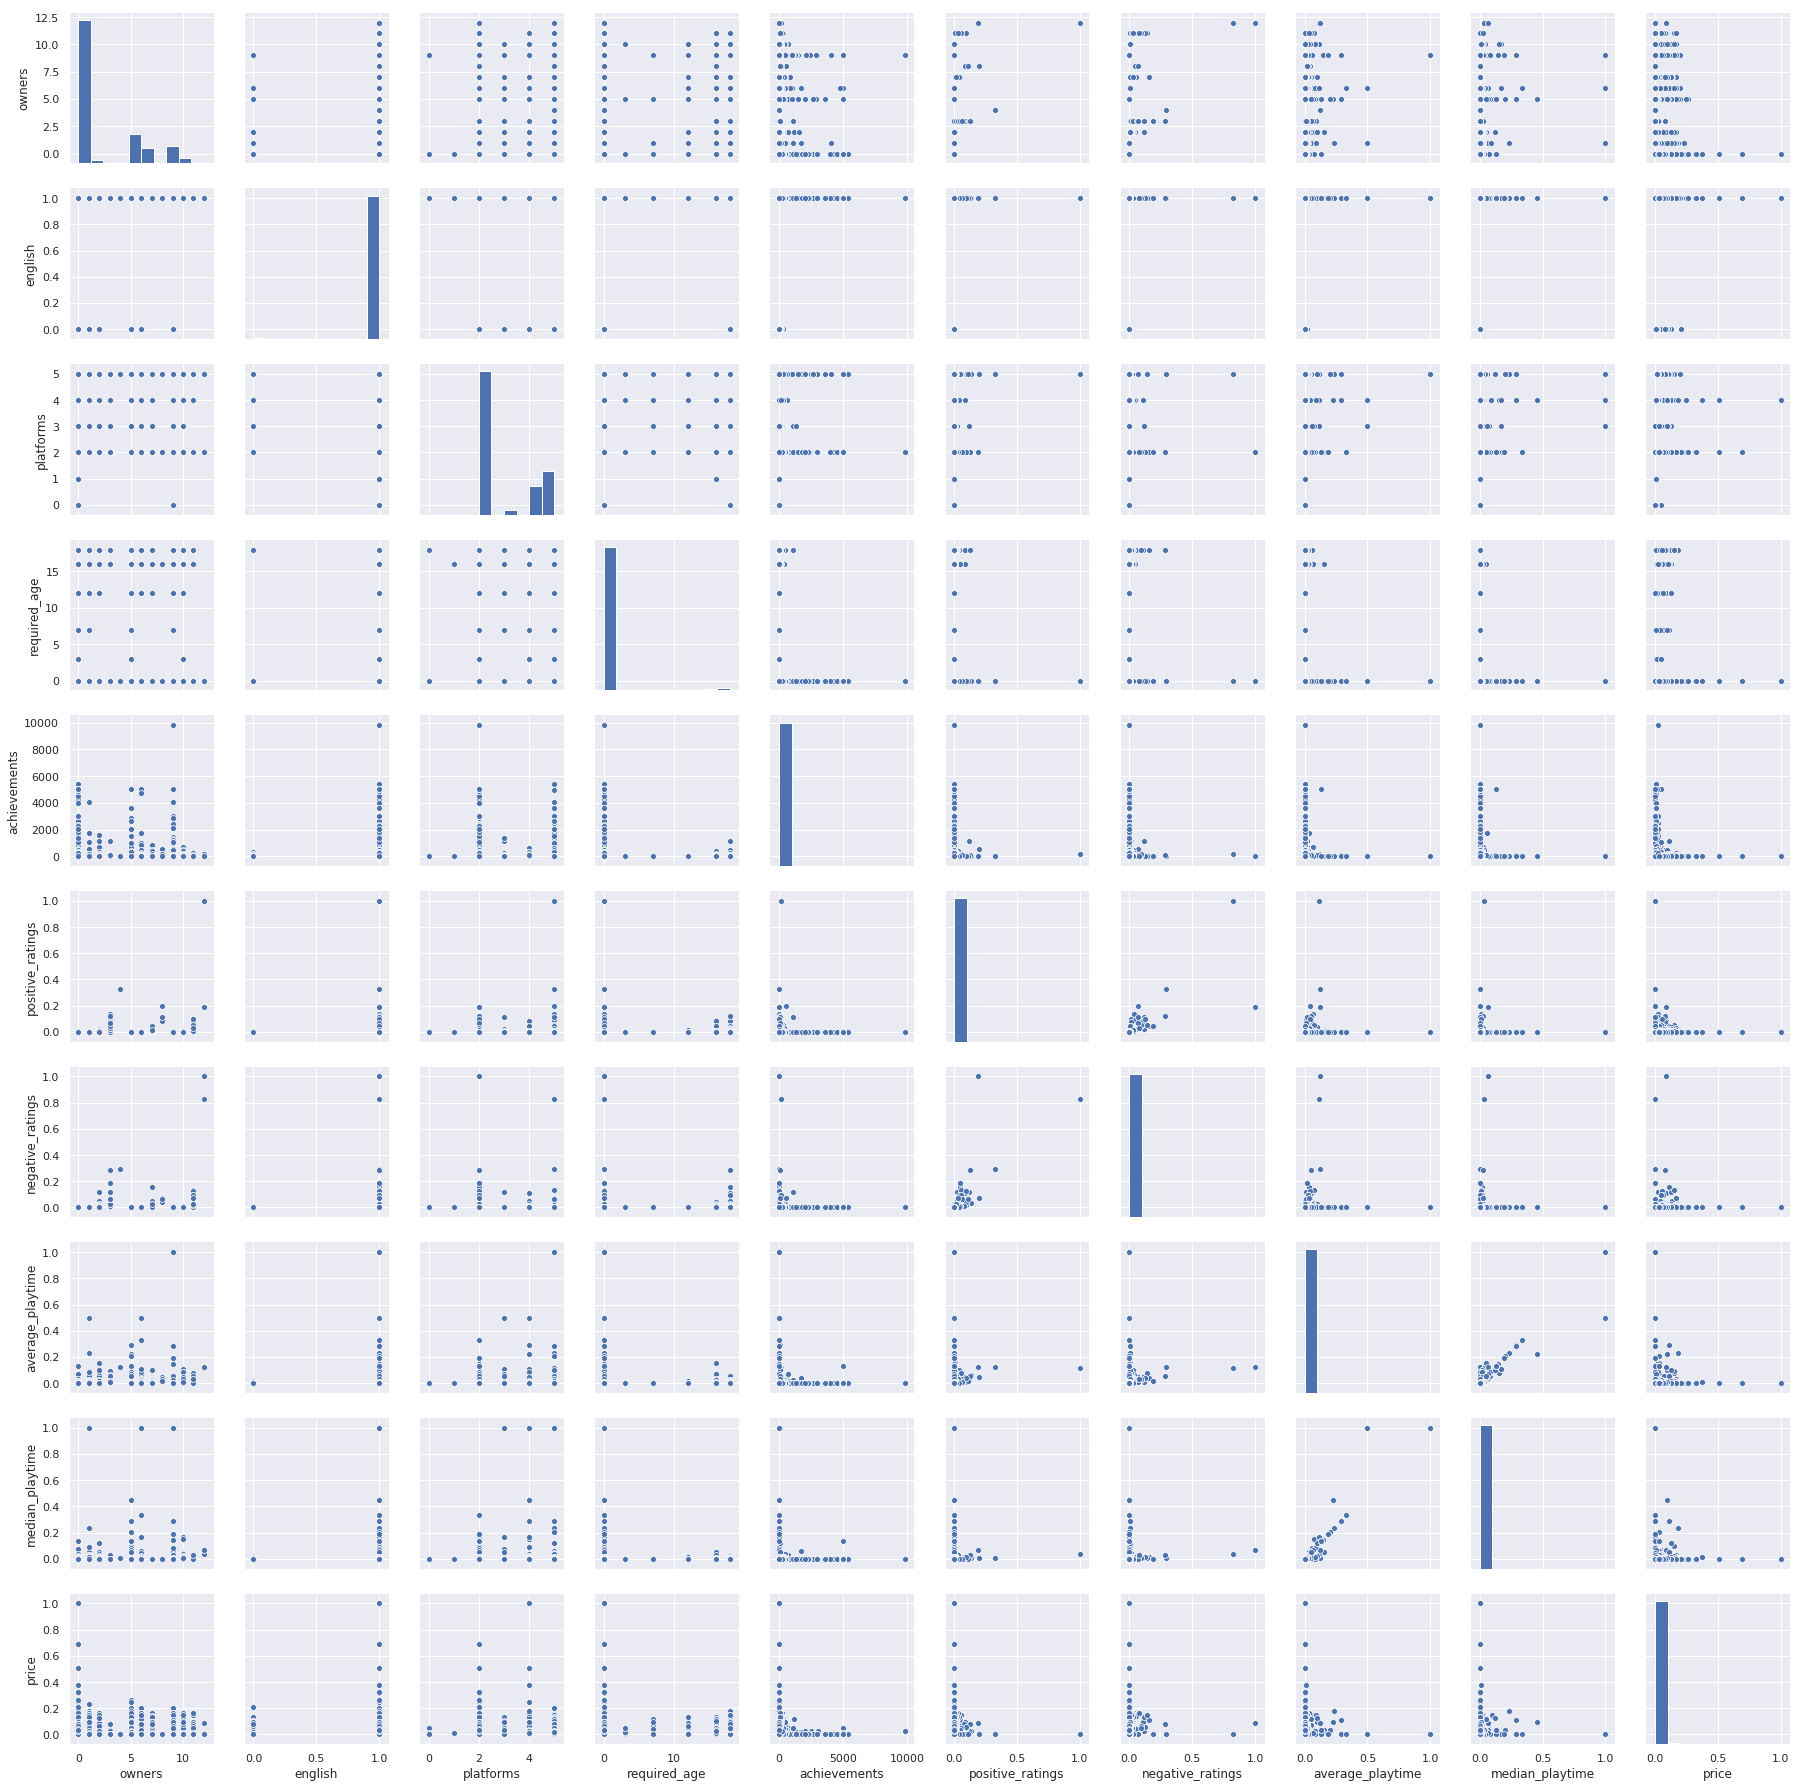

In [13]:
col1 = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price']
pairs1 = sns.pairplot(st[col1])



In [0]:
pairs1.savefig('pairs.png')

In [0]:


files.download('heatmap.png')

In [0]:
# import os

# print(os)
# print(os.getcwd())

# print(os.listdir(os.getcwd()))


# st.to_csv('st_modified1.csv')


In [0]:
st.to_csv('st_modified2.csv')

In [0]:
from google.colab import files

files.download('st_modified2.csv')


In [0]:
files.download('pairs.png')

# Modeling

## Preparing

In [0]:
from sklearn import tree, linear_model, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor , GradientBoostingRegressor
from sklearn.linear_model import Perceptron

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import BaggingRegressor, HistGradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [76]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/st_modified4.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Player,VAC,STC,PCS,ISS,Cloud,Action,Free,Strategy,Adventure,Indie,RPG,Casual,Racing
0,1,Counter-Strike,1/11/00,1,Valve,Valve,6.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.047093,0.006855,0.092391,0.001663,3.0,0.017038,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,6.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.001255,0.001300,0.001453,0.000325,11.0,0.009455,1,1,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Day of Defeat,1/5/03,1,Valve,Valve,6.0,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,0.001292,0.000817,0.000981,0.000178,11.0,0.009455,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,6.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.000481,0.000548,0.001353,0.000965,11.0,0.009455,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,6.0,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,0.001985,0.000591,0.003273,0.002177,11.0,0.009455,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
changes = ['english', 'platforms','owners','VAC',	'STC',	'PCS',	'ISS',	'Player'	,'Cloud',	'Action',	'Free'	,'Strategy'	,'Adventure',	'Indie',	'RPG',	'Casual',	'Racing']
for a in changes:
  st[a] = st[a].astype('object')


In [0]:
cols = ['english', 'platforms', 'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price', 'VAC',	'STC',	'PCS',	'ISS',	'Player'	,'Cloud',	'Action',	'Free', 'Strategy','Adventure',		'Indie',	'RPG',	'Casual',	'Racing' ]



In [0]:
cols = ['english','platforms', 'required_age','achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price', 	'STC',	'PCS',	'Player'	,'Cloud',	'Action',	'Free', 'Strategy','Adventure',		'Indie',	'RPG',	'Casual' ]


In [0]:
X = st[cols].values
y = st['owners'].values
original_indexes = st['appid'].values

train_size = 20000
X_train, X_test, y_train, y_test, ind_train, ind_test = \
        train_test_split(X, y, original_indexes, train_size=train_size, test_size=len(y)-train_size)

In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20000, 23) (7075, 23) (20000,) (7075,)


In [71]:
st.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms           float64
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings    float64
negative_ratings    float64
average_playtime    float64
median_playtime     float64
owners              float64
price               float64
Player                int64
VAC                   int64
STC                   int64
PCS                   int64
ISS                   int64
Cloud                 int64
Action                int64
Free                  int64
Strategy              int64
Adventure             int64
Indie                 int64
RPG                   int64
Casual                int64
Racing                int64
dtype: object

In [13]:
st[cols].describe()

,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,0.354903,45.248864,0.000378,0.000433,0.000786,0.000766,0.014404
std,2.406044,352.670281,0.007181,0.008797,0.009584,0.012348,0.018661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000002,0.000004,0.000000,0.000000,0.004005
50%,0.000000,7.000000,0.000009,0.000018,0.000000,0.000000,0.009455
75%,0.000000,23.000000,0.000048,0.000086,0.000000,0.000000,0.017038
max,18.000000,9821.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:

def rmse_score(regressor, X_train, y_train,X_test,y_test):
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  score = r2_score(y_test, y_pred)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  return score,RMSE


def DecTreeParas(X_train, y_train,X_test,y_test, ranges, para):

  scores = []
  RMSEs = []

  for i in ranges:
    params = {
        para: i
    }
    dt = DecisionTreeRegressor(**params)
    score, RMSE = rmse_score(dt, X_train, y_train,X_test,y_test)
    scores.append(score)
    RMSEs.append(RMSE)
  return scores, RMSEs

  
def RanForParas(X_train, y_train,X_test,y_test, ranges, para):

  scores = []
  RMSEs = []

  for i in ranges:
    params = {
#         'n_estimators':110,
        para: i
    }
    rf = RandomForestRegressor(**params)
    score, RMSE = rmse_score(rf, X_train, y_train,X_test,y_test)
    scores.append(score)
    RMSEs.append(RMSE)
  return scores, RMSEs


def BagParas(X_train, y_train,X_test,y_test, ranges, para):
  scores = []
  RMSEs = []

  for i in ranges:
    params = {
#         'n_estimators':200,
        para: i
    }
    br = BaggingRegressor(**params)
    score , RMSE = rmse_score(br, X_train, y_train, X_test, y_test)
    scores.append(score)
    RMSEs.append(RMSE)
  return scores, RMSEs

def HisGraBooParas(X_train, y_train,X_test,y_test, ranges, para):
  scores = []
  RMSEs = []

  for i in ranges:
    params = {
#         'n_estimators':200,
        para: i
    }
    hgb = HistGradientBoostingRegressor(**params)
    score , RMSE = rmse_score(hgb, X_train, y_train, X_test, y_test)
    scores.append(score)
    RMSEs.append(RMSE)
  return scores, RMSEs

def plot_score_rmse(x,x_label,scores,RMSEs):
  ax = plt.gca()

  ax1=plt.subplot(2, 1, 1)
  ax1.plot(x, scores, label = 'score')
  plt.xlabel(x_label)
  plt.ylabel('scores')

  ax2=plt.subplot(2,1,2)
  ax2.plot(x, RMSEs, label = 'RMSE')
  plt.xlabel(x_label)
  plt.ylabel('RMSE')

  plt.show()
  
  
def get_best(scores,RMSEs,ranges):
  max_scores = max(scores)
  index = scores.index(max_scores)
  print('max scores: ', max_scores,'\nmin RMSE: ',min(RMSEs),'\nthe best:',ranges[index])
  
  
def get_results(scores,RMSEs,x,x_label):
  get_best(scores,RMSEs,x)
  plot_score_rmse(x, x_label, scores, RMSEs)

## Linear Regression

In [9]:
lr = linear_model.LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(lr.score(X_train, y_train))

print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

0.20256388198255681
[ 5.73769181e-01  1.71406422e-01  6.83500383e-02  1.25753121e-04
  1.81303859e+01  1.48679712e+01  1.76082479e+01 -5.56318820e-01
  1.43442415e+00  2.30794570e+00  1.88580790e+00  1.49192455e-01
  1.47669003e+00  6.41727836e-01  3.04473235e-01 -1.17487300e-02
  2.51575185e+00  1.25138406e-01 -4.65480269e-03 -8.06276979e-01
  6.97507527e-02 -3.83148234e-01 -7.79123715e-02]
2.7726164129664426
0.17960525448365738


## Decision Tree Regression

In [0]:
max_depths = range(3,20,2)

scores, RMSEs = DecTreeParas(X_train, y_train,X_test,y_test, max_depths, 'max_depth')

max scores:  0.4985719733501124 
min RMSE:  2.1676175421865853 
the best max_depths: 7


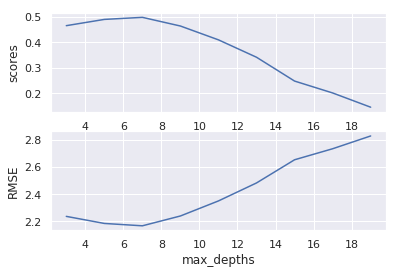

In [11]:
get_results(scores,RMSEs,max_depths,'max_depths')

## Random Forest Regression

### training

In [0]:
max_depths = range(3,15,1)

scores, RMSEs = RanForParas(X_train, y_train,X_test,y_test, max_depths, 'max_depth')

max scores:  0.5414084527906697 
min RMSE:  2.072962174144971 
the best max_depths: 11


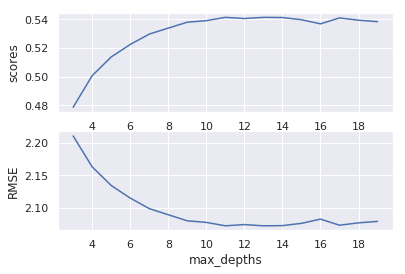

In [16]:
get_results(scores,RMSEs,max_depths,'max_depths')

max scores:  0.5541263041840805 
min RMSE:  1.9979935490361416 
the best max_depths: 11


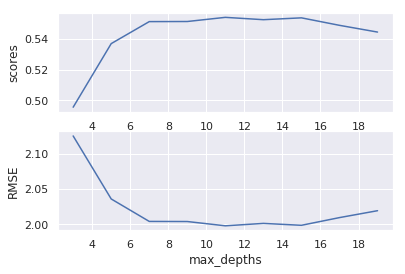

In [21]:
get_results(scores,RMSEs,max_depths,'max_depths')

In [0]:
n_estimator = range(10,200,20)

scores, RMSEs = RanForParas(X_train, y_train,X_test,y_test, n_estimator, 'n_estimators')

max scores:  0.5330216277556267 
min RMSE:  2.050476688027545 
the best: 130


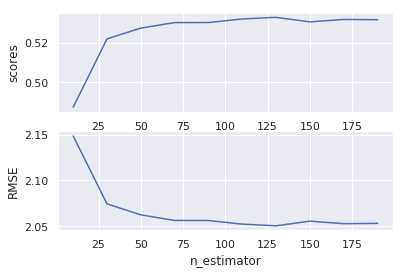

In [75]:
get_results(scores,RMSEs,n_estimator,'n_estimator')

In [0]:
get_best(scores,RMSEs,n_estimator)
plot_score_rmse(n_estimator, 'n_estimator', scores, RMSEs)

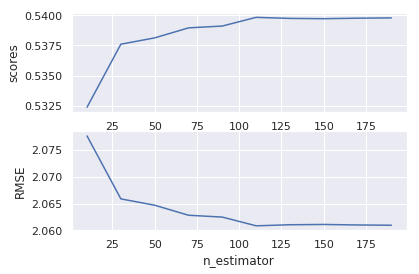

In [28]:
plot_score_rmse(n_estimator, 'n_estimator', scores, RMSEs)

In [0]:
min_samples_splits = range(10,50,2)

scores, RMSEs = RanForParas(X_train, y_train,X_test,y_test, min_samples_splits, 'min_samples_split')

max scores:  0.542046038820065 
min RMSE:  2.0715206392531478 
the best: 24


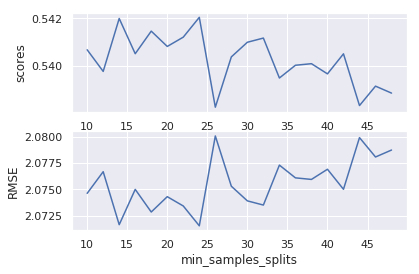

In [25]:
get_results(scores,RMSEs,min_samples_splits,'min_samples_splits')

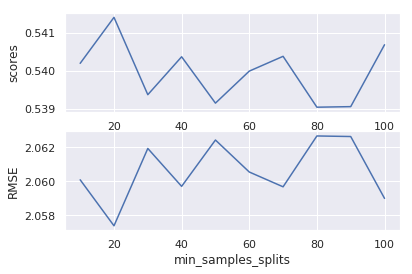

In [30]:
plot_score_rmse(min_samples_splits, 'min_samples_splits', scores, RMSEs)

In [0]:
min_samples_leaves = range(1,41,5)
scores, RMSEs = RanForParas(X_train, y_train,X_test,y_test, min_samples_leaves, 'min_samples_leaf')

max scores:  0.5417090918500787 
min RMSE:  2.0722825763900827 
the best: 6


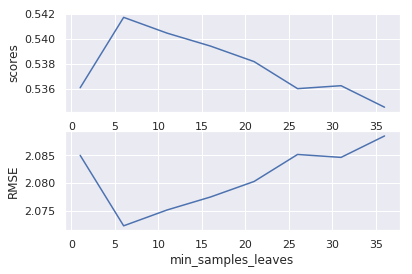

In [28]:
get_results(scores,RMSEs,min_samples_leaves,'min_samples_leaves')

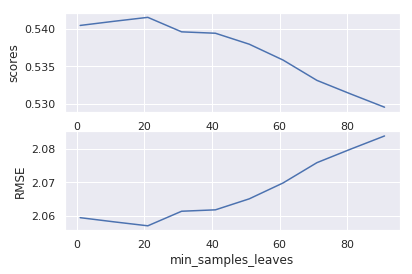

In [34]:
plot_score_rmse(min_samples_leaves, 'min_samples_leaves', scores, RMSEs)

In [0]:
max_feature = range(1,25,2)
scores, RMSEs = RanForParas(X_train, y_train,X_test,y_test, max_feature, 'max_features')

max scores:  0.5451897451695022 
min RMSE:  2.0643982341709495 
the best: 5


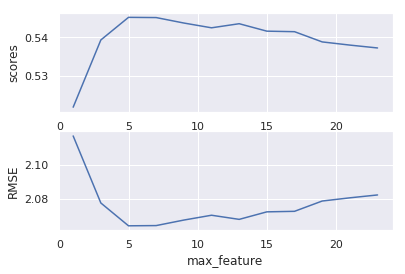

In [37]:
get_results(scores,RMSEs,max_feature,'max_feature')

max scores:  0.5432930320632812 
min RMSE:  2.0686983761760027 
the best: 11


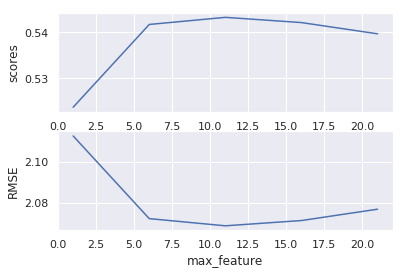

In [35]:
get_results(scores,RMSEs,max_feature,'max_feature')

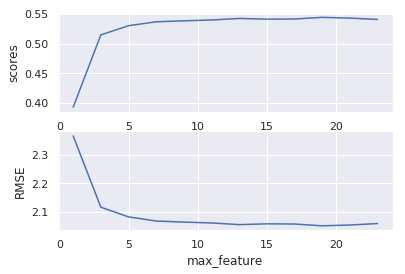

In [62]:
plot_score_rmse(max_feature, 'max_feature', scores, RMSEs)

### importance

In [0]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
print("重要性：",importances)

 1) negative_ratings               0.465875
 2) positive_ratings               0.151886
 3) price                          0.077111
 4) median_playtime                0.057033
 5) average_playtime               0.054516
 6) achievements                   0.053691
 7) platforms                      0.017269
 8) Indie                          0.014076
 9) Free                           0.012138
10) Adventure                      0.011053
11) STC                            0.010878
12) Action                         0.010632
13) Casual                         0.009817
14) Strategy                       0.009189
15) Cloud                          0.009106
16) RPG                            0.009020
17) PCS                            0.008837
18) Player                         0.008541
19) Racing                         0.003515
20) required_age                   0.002970
21) english                        0.001879
22) VAC                            0.000655
23) ISS                         

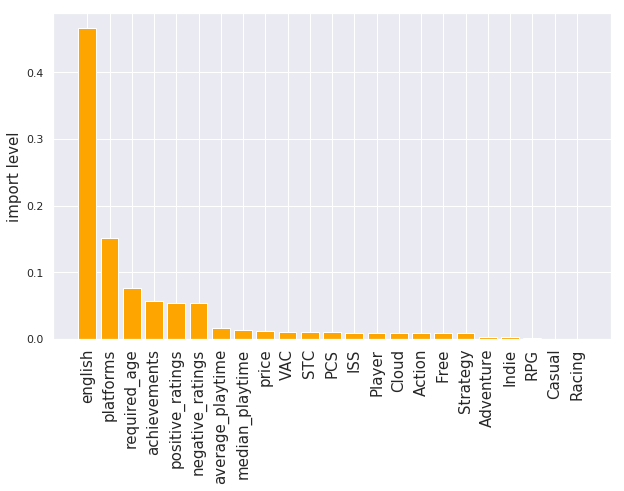

In [50]:
feat_labels = cols
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
 
 

threshold = 0.15
x_selected = X_train[:,importances > threshold]
 
# 可视化

plt.figure(figsize=(10,6))

plt.ylabel("import level",fontsize = 15,rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(len(cols)):
    plt.bar(i,importances[indices[i]],color='orange',align='center')
    plt.xticks(np.arange(len(cols)),feat_labels[indices[i]],rotation=90,fontsize=15)
plt.show()

### Testing

In [79]:
params = {
        'n_estimators': 110,
        'max_depth': 9,
        'min_samples_split': 24,
        'min_samples_leaf': 5,
        'max_features': 5
    }

rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# print(dt.score(X_train, y_train))
# print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

2.0869896756535433
0.5289286556526178


In [82]:
params = {
        'n_estimators': 110,
        'max_depth': 9,
        'min_samples_split': 24,
        'min_samples_leaf': 5,
        'max_features': 5
    }

rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# print(dt.score(X_train, y_train))
# print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))


2.039581655569965
0.539979913836202


In [90]:
params = {
        'n_estimators': 110,
        'max_depth': 9,
        'min_samples_split': 24,
        'min_samples_leaf': 5,
        'max_features': 5
    }

rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# print(dt.score(X_train, y_train))
# print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))


2.1142302062779423
0.5247764632120127


## Bagging Regression

In [0]:
n_estimator = range(10,201,20)

scores, RMSEs = BagParas(X_train, y_train,X_test,y_test, n_estimator, 'n_estimators')

max scores:  0.4156028229449835 
min RMSE:  2.2628670541686766 
the best: 190


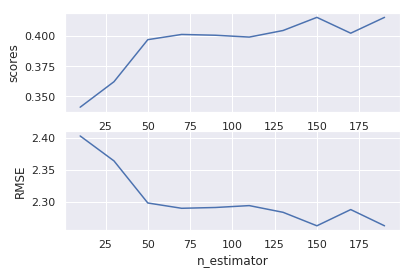

In [42]:
get_results(scores,RMSEs,n_estimator,'n_estimator')

In [0]:

max_sample = range(10,200,5)

scores, RMSEs = BagParas(X_train, y_train,X_test,y_test, max_sample, 'max_samples')

max scores:  0.4614896931577761 
min RMSE:  2.201929767192097 
the best: 120


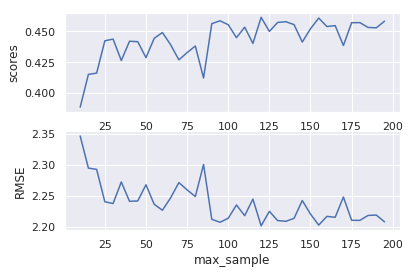

In [56]:
get_results(scores,RMSEs,max_sample,'max_sample')

In [0]:
max_feature = range(1,25,2)

scores, RMSEs = BagParas(X_train, y_train,X_test,y_test, max_feature, 'max_features')

max scores:  0.4960267769291741 
min RMSE:  2.130149986709049 
the best: 21


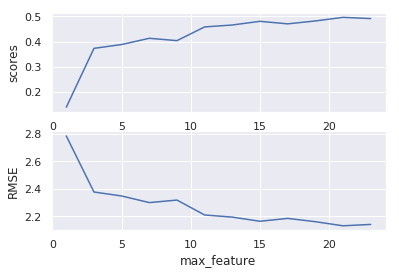

In [59]:
get_results(scores,RMSEs,max_feature,'max_feature')

## Gradient Boosting Regression

Text(0, 0.5, 'Deviance')

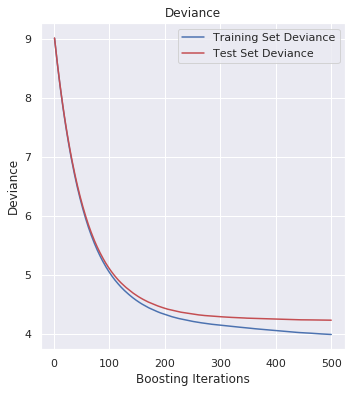

In [32]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [0]:
learning_rates = [.1,.6,1.1,1.6,2.1,2.6,3.1,3.6,4.1,4.6,5.1,5.6]
scores, RMSEs = GraBooParas(X_train, y_train,X_test,y_test, learning_rates, 'learning_rate')

In [87]:
plot_score_rmse(learning_rates, 'learning_rates', scores, RMSEs)

max scores:  0.5339137845400979 
min RMSE:  2.074103266995491 
the best max_depths: 0.1


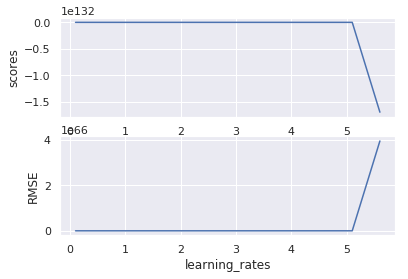

In [89]:
plot_score_rmse(learning_rates, 'learning_rates', scores, RMSEs)

In [0]:
n_estimator = range(10,200,20)

scores = []
RMSEs = []

for ne in n_estimator:
  gbr = GradientBoostingRegressor(n_estimators = ne)
  score , RMSE = rmse_score(gbr, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

max scores:  0.5369579064604604 
min RMSE:  2.067318936015868 
the best max_depths: 190


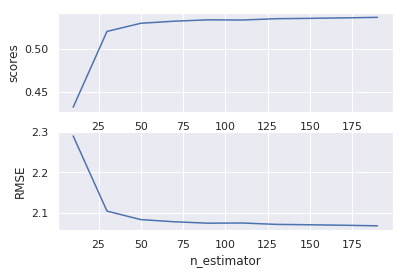

In [91]:
get_best(scores,RMSEs,n_estimator)
plot_score_rmse(n_estimator, 'n_estimator', scores, RMSEs)

In [0]:
max_depths = range(3,8,1)

scores, RMSEs = GraBooParas(X_train, y_train,X_test,y_test, max_depths, 'max_depth')

max scores:  0.5338574500907523 
min RMSE:  2.0899588176929234 
the best: 4


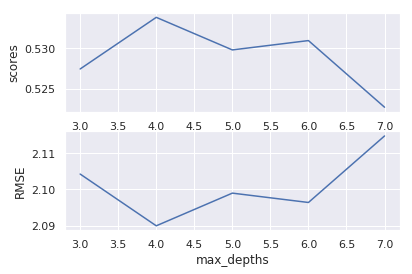

In [39]:
get_results(scores,RMSEs,max_depths,'max_depths')

max scores:  0.5400650314061508 
min RMSE:  2.0603711549103885 
the best max_depths: 4


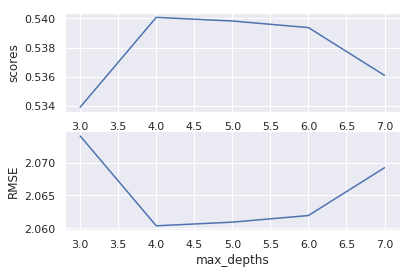

In [96]:
get_best(scores,RMSEs,max_depths)
plot_score_rmse(max_depths, 'max_depths', scores, RMSEs)

In [0]:
min_samples_splits = range(10,101,10)
scores, RMSEs = GraBooParas(X_train, y_train,X_test,y_test, min_samples_splits, 'min_samples_split')

max scores:  0.5265170741959326 
min RMSE:  2.1063498980253557 
the best: 30


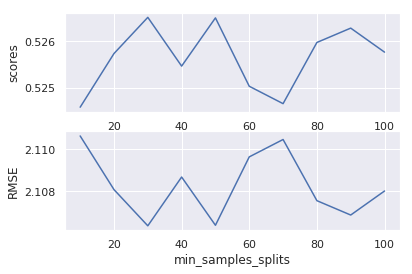

In [41]:
get_results(scores,RMSEs,min_samples_splits,'min_samples_splits')

max scores:  0.5416800040138312 
min RMSE:  2.0567506767323667 
the best max_depths: 20


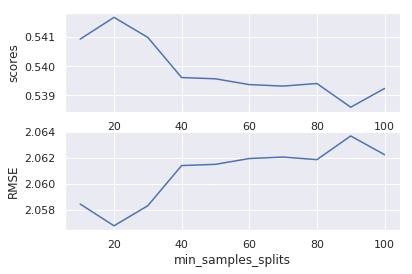

In [98]:
get_best(scores,RMSEs,min_samples_splits)
plot_score_rmse(min_samples_splits, 'min_samples_splits', scores, RMSEs)

In [0]:
min_samples_leaves = range(1,101,10)
scores, RMSEs = GraBooParas(X_train, y_train,X_test,y_test, min_samples_leaves, 'min_samples_leaf')

max scores:  0.5294191387436915 
min RMSE:  2.099884872139064 
the best: 41


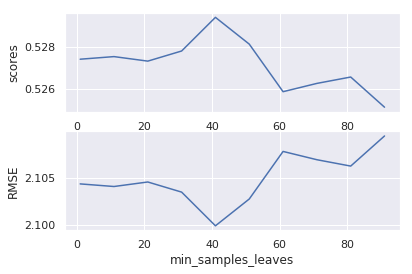

In [50]:
get_results(scores,RMSEs,min_samples_leaves,'min_samples_leaves')

In [0]:
min_samples_leaves = range(20,50,5)
scores, RMSEs = GraBooParas(X_train, y_train,X_test,y_test, min_samples_leaves, 'min_samples_leaf')

max scores:  0.5297332790353069 
min RMSE:  2.0991838570454453 
the best: 40


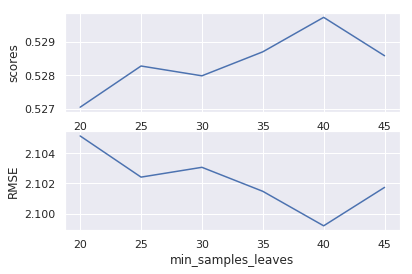

In [52]:
get_results(scores,RMSEs,min_samples_leaves,'min_samples_leaves')

## Hist Gradient Boosting Regression

In [0]:
max_depths = range(3,15,1)

scores, RMSEs = HisGraBooParas(X_train, y_train,X_test,y_test, max_depths, 'max_depth')


max scores:  0.4705236427742293 
min RMSE:  2.1539135624911685 
the best: 4


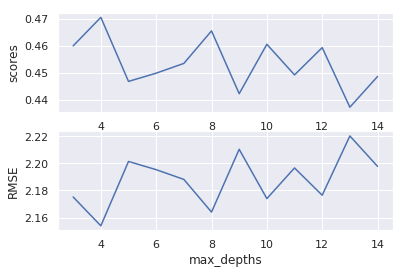

In [38]:
get_results(scores,RMSEs,max_depths,'max_depths')

In [0]:
min_samples_leaves = range(1,101,10)
scores, RMSEs = HisGraBooParas(X_train, y_train,X_test,y_test, min_samples_leaves, 'min_samples_leaf')

max scores:  0.5397845410302999 
min RMSE:  2.0355747451448654 
the best: 31


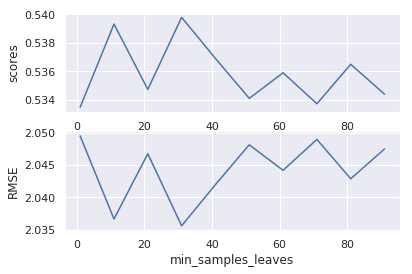

In [65]:
get_results(scores,RMSEs,min_samples_leaves,'min_samples_leaves')

In [0]:
min_samples_leaves = range(20,50,5)
scores, RMSEs = HisGraBooParas(X_train, y_train,X_test,y_test, min_samples_leaves, 'min_samples_leaf')

max scores:  0.5401147416166203 
min RMSE:  2.0348443605287088 
the best: 30


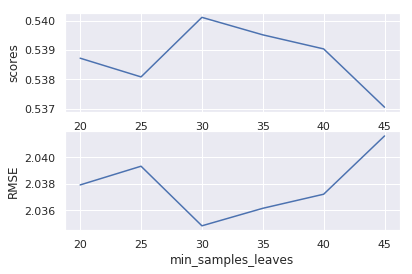

In [67]:
get_results(scores,RMSEs,min_samples_leaves,'min_samples_leaves')

In [0]:
max_bin = range(2,257,5)
scores, RMSEs = HisGraBooParas(X_train, y_train,X_test,y_test, max_bin, 'max_bins')

max scores:  0.5404258818588553 
min RMSE:  2.034155896310422 
the best: 202


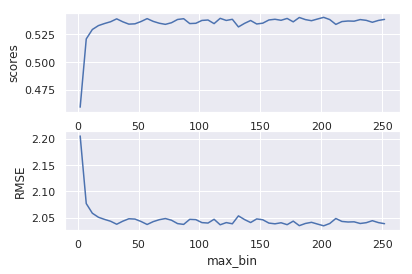

In [70]:
get_results(scores,RMSEs,max_bin,'max_bin')

## Perceptron

In [28]:
clf = Perceptron()
clf.fit(X_train, y_train)  


y_pred = clf.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(clf.score(X_train, y_train))

# print(clf.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

0.5444
3.439574301871072
-0.3142437688565125


In [0]:
# Environment and constant preparation
%matplotlib inline
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
try:
    import plotly.graph_objects as go
except:
    !pip install plotly==4.1.0
import matplotlib.pyplot as plt
import torchvision.datasets as cvdata
import torchvision.transforms as transforms
from pathlib import Path
import torch


COLAB = True


In [0]:
DATA_FOLDER = Path("./data").absolute()
DATA_FOLDER.mkdir(parents=True, exist_ok=True)
DATA_FOLDER = str(DATA_FOLDER)
IRIS_EXPERIMENT_X_SPACE_QUANTISATION_BIN_NUM = 50 # self-interpretation

In [187]:
# Defining processing functions
def feature_maker_overall_green(X):
    return X[:, 1].reshape(X.shape[0], -1).sum(axis=1)

def feature_maker_overall_blue(X):
    return X[:, 2].reshape(X.shape[0], -1).sum(axis=1)

def take_a_separable_subset(X, y, original_indexes):
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X, y)
    pred = lr.predict(X)
    pred_prob = lr.predict_log_proba(X_train)
    confident_ind = np.logical_or(pred_prob[:, 0] > np.log(0.55),
                                  pred_prob[:, 1] > np.log(0.55))
    ind = np.logical_and(confident_ind, pred==y)
    X_simple = X[ind]
    y_simple = y[ind]
    original_indexes_simple = original_indexes[ind]
    return X_simple, y_simple, original_indexes_simple

def prepare_cifar_two_class_data(
    X, y, original_indexes,
    simple=False,
    train_size=1000,
    make_feature_1=feature_maker_overall_green, 
    make_feature_2=feature_maker_overall_blue):
    feature1 = make_feature_1(X)
    feature2 = make_feature_2(X)
    X = np.stack([feature1, feature2], axis=1)
    # normalise to -1 to +1
    X -= X.min(axis=0)
    X /= X.max(axis=0)
    X -= 0.5
    X *= 2.0
    
    X_train, X_test, y_train, y_test, ind_train, ind_test = \
        train_test_split(X, y, original_indexes, 
                         train_size=train_size, test_size=len(y)-train_size)
    return X_train, X_test, y_train, y_test, ind_train, ind_test

def prepare_cifar_two_class_separable_data(
    X, y, original_indexes, train_size=100):
    
    X_simple, y_simple, indexes_simple = \
        take_a_separable_subset(X, y, original_indexes)
    
    X_train_simple, X_test_simple, \
    y_train_simple, y_test_simple, \
    ind_train_simple, ind_test_simple = \
        train_test_split(X_simple, y_simple, indexes_simple, 
                         train_size=train_size, test_size=len(y_simple)-100)
    return X_train_simple, X_test_simple, \
        y_train_simple, y_test_simple, \
        ind_train_simple, ind_test_simple
    
X_train, X_test, y_train, y_test, ind_train, ind_test = \
    prepare_cifar_two_class_data(X, y, indexes)
X_train_simple, X_test_simple, \
y_train_simple, y_test_simple, \
ind_train_simple, ind_test_simple = prepare_cifar_two_class_separable_data(
    X_train, y_train, ind_train)

def quick_separable_train_sample(n=100):
    X_train_simple, X_test_simple, \
    y_train_simple, y_test_simple, \
    ind_train_simple, ind_test_simple = prepare_cifar_two_class_separable_data(
        X_train, y_train, ind_train, train_size=n)
    
    
    return X_train_simple, y_train_simple, ind_train_simple

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [0]:
# Defining vis-functions
def show_cifar_image(img_id):
    npimg = ((cifar_trainset[img_id][0].detach().numpy() + 1.0) \
        * 128).astype(np.uint8).transpose((1, 2, 0))
    # plt.imshow(npimg, interpolation='nearest') # for larger view
    return Image.fromarray(npimg), npimg

def encode_sample_image(index):
    """
    Generate the resource url to display an image in a webpage.
    This is not used in notebooks. But you can take the function
    in a standalone Python program as a web-server to visual data models.
    """
    import base64
    from io import BytesIO

    pil_img = Image.fromarray(((cifar_trainset[index][0].numpy()
                                .transpose([1, 2, 0]) + 1.0) * 128).astype(np.uint8))
    buff = BytesIO()
    pil_img.save(buff, format="JPEG")
    new_image_string = base64.b64encode(buff.getvalue()).decode("utf-8")
    # print(new_image_string[:100])
    return """<img src="data:image/png;base64,""" \
        + """"></img>"""

def show_perceptron_model(model, X_train, y_train, indexes_train=[]):
    layout = go.Layout(
        xaxis=go.layout.XAxis(
            range=[-1, 1],
            showgrid=True,
            zeroline=True,
            showline=True,
            gridcolor='#bdbdbd',
            gridwidth=1,
            zerolinecolor='#969696',
            zerolinewidth=2,
            linecolor='#636363',
            linewidth=2,
            mirror=True,
        ),
        yaxis=go.layout.YAxis(
            range=[-1, 1],
            showgrid=True,
            zeroline=True,
            showline=True,
            gridcolor='#bdbdbd',
            gridwidth=1,
            zerolinecolor='#969696',
            zerolinewidth=2,
            linecolor='#636363',
            linewidth=2,
            mirror=True,
       ),
       height=600,
       width=600,
    )

    # visualise perceptron model on a grid
    x_grid, y_grid = np.meshgrid(np.arange(-1, 1.01, 0.05), np.arange(-1, 1.01, 0.05))
    grid_X = np.stack(( x_grid.flatten(), y_grid.flatten()) ).T
    grid_pred = model.predict(grid_X)
    train_pred = model.predict(X_train)
    train_error_num = (train_pred.astype(np.int) != y_train.astype(np.int)).sum()
    E_in = train_error_num / len(y_train)

    scatter_grid = go.Scatter(
        x=grid_X[:, 0], y=grid_X[:, 1], 
        marker=dict(
            size=6,
            cmax=1,
            cmin=-1,
            line_width=1,
            color=grid_pred,
            colorscale="Cividis",
            symbol="square",
            opacity=0.5
        ),
        mode="markers",
    #     colorscale=,
        name="'All' X Space Samples",
        hoverinfo="none")
    
    contour_grid = go.Contour(
        z=grid_pred,
        x=grid_X[:, 0], # horizontal axis
        y=grid_X[:, 1], # vertical axis
        hoverinfo="none",
        colorscale="Cividis",
        showscale=False
    )
    
    if len(indexes_train) == 0:
        scatter_train_text = ["X:({:.02f}, {:.02f})<br>y:{}, pred:{}".format(x0, x1, int(y), int(p)) 
              for (x0, x1), y, p in zip(X_train, y_train, train_pred)] 
    else:
        scatter_train_text = ["X:({:.02f}, {:.02f})<br>y:{}, pred:{}, ImgID {:d}"\
                              .format(x0, x1, int(y), int(p), i) 
                              for (x0, x1), y, p, i in zip(X_train, y_train, train_pred, indexes_train)] 
        

    scatter_train = go.Scatter(
        x=X_train[:, 0], y=X_train[:, 1],
         marker=dict(
             size=12,
             cmax=1,
             cmin=-1,
             color=y_train,
             colorscale="Cividis",
             line=dict(
                 width=2,
                 color=["green" if prediction == ground_truth else "red"
                        for prediction, ground_truth in zip(train_pred, y_train)]
             )

        ),
        mode="markers",
        name="Dataset Samples",
        text=scatter_train_text,
        hoverinfo="text")

    fig = go.Figure(
        data=[
            contour_grid, scatter_train
        ],
        layout=layout,
        layout_title_text="Two Object Class 2D Data<br>#.errors={:d}, E_in={:.3f}"\
            .format(train_error_num, E_in)
    )
    if COLAB:
        fig.show(renderer="colab")
    else:
        fig.show()

In [191]:

p = Perceptron()
p.fit(X_train, y_train)
show_perceptron_model(p, X_train, y_train)

# comparation

training DT
training RF
training HGB
training BR


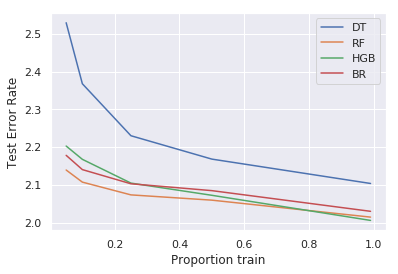

In [34]:


heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
X = st[cols].values
y = st['owners'].values

classifiers = [
    ("DT", DecisionTreeRegressor(max_depth = 7)),
    ("RF", RandomForestRegressor(n_estimators = 110, max_depth = 11, min_samples_split = 24, min_samples_leaf =6 , max_features = 11)),
    ("HGB", HistGradientBoostingRegressor(max_depth = 11, min_samples_leaf =41)),
    ("BR", BaggingRegressor(n_estimators = 110)),
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
            yy_.append(RMSE)
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()